In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!git clone https://github.com/taehojo/data-ch20.git

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

Cloning into 'data-ch20'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 265 (delta 0), reused 265 (delta 0), pack-reused 0
Receiving objects: 100% (265/265), 1.86 MiB | 36.66 MiB/s, done.


In [ ]:
train_generator = train_datagen.flow_from_directory(
    './data-ch20/train',
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './data-ch20/test',
    target_size=(150,150),
    batch_size=5,
    class_mode='binary'
)

Found 120 images belonging to 2 classes.


In [ ]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
transfer_model.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 activation_1 (Activation)   (None, 1)                 0

In [ ]:
finetune_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

esc = EarlyStopping(monitor='val_loss', patience=5)

history = finetune_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    validation_steps=10,
    callbacks=[esc]
)

Epoch 1/20
32/32 [==============================] - 16s 52ms/step - loss: 0.8155 - accuracy: 0.5688 - val_loss: 0.6470 - val_accuracy: 0.5400
Epoch 2/20
32/32 [==============================] - 1s 44ms/step - loss: 0.6089 - accuracy: 0.6812 - val_loss: 0.6312 - val_accuracy: 0.5400
Epoch 3/20
32/32 [==============================] - 2s 48ms/step - loss: 0.5436 - accuracy: 0.7688 - val_loss: 0.4986 - val_accuracy: 0.9000
Epoch 4/20
32/32 [==============================] - 1s 45ms/step - loss: 0.4998 - accuracy: 0.8125 - val_loss: 0.4575 - val_accuracy: 0.8800
Epoch 5/20
32/32 [==============================] - 1s 44ms/step - loss: 0.4581 - accuracy: 0.8438 - val_loss: 0.4024 - val_accuracy: 0.9400
Epoch 6/20
32/32 [==============================] - 1s 45ms/step - loss: 0.4498 - accuracy: 0.8313 - val_loss: 0.4257 - val_accuracy: 0.8600
Epoch 7/20
32/32 [==============================] - 1s 45ms/step - loss: 0.3969 - accuracy: 0.8625 - val_loss: 0.3548 - val_accuracy: 0.8800
Epoch 8/20
3

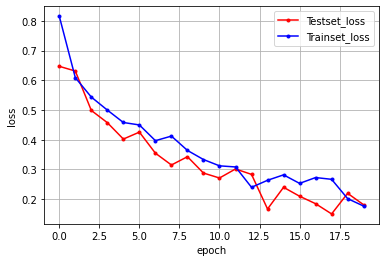

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()